In [179]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

In [180]:
df = pd.read_csv("/Users/banan/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


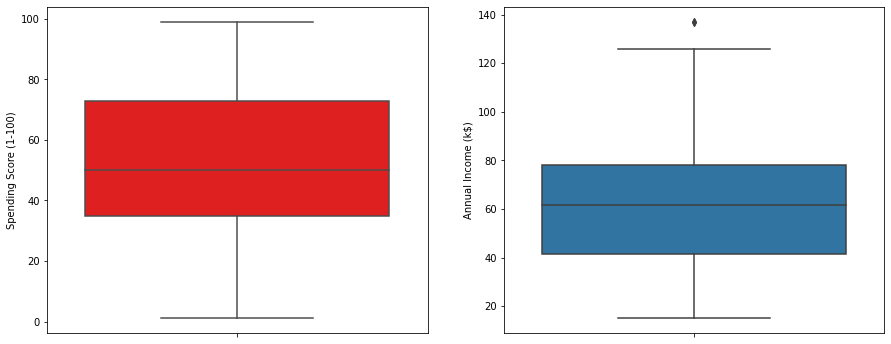

In [181]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

In [182]:
X=df.iloc[:, [3,4]].values

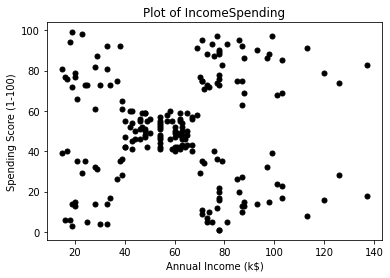

In [183]:
plt.scatter(X[:, 0], X[:, 1], s = 25, c = 'black')
plt.title('Plot of IncomeSpending') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.show()

#### determining the maximum number of clusters

In [184]:
limit = int((X.shape[0]//2)**0.5)


In [185]:
inertiaList = [] 
for i in range(2, limit+1): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    pred = kmeans.predict(X)
    inertiaList.append(kmeans.inertia_)
    score = silhouette_score(X, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(i, score))

Silhouette Score for k = 2: 0.297
Silhouette Score for k = 3: 0.468
Silhouette Score for k = 4: 0.493
Silhouette Score for k = 5: 0.554
Silhouette Score for k = 6: 0.540
Silhouette Score for k = 7: 0.526
Silhouette Score for k = 8: 0.458
Silhouette Score for k = 9: 0.457
Silhouette Score for k = 10: 0.459


In [186]:
for i in inertiaList:
    print(i/1000)

181.36359595959598
106.34837306211118
73.67978903948836
44.44845544793371
37.23381451071001
30.259657207285464
25.01183934915659
21.85016528258563
19.67207284901432


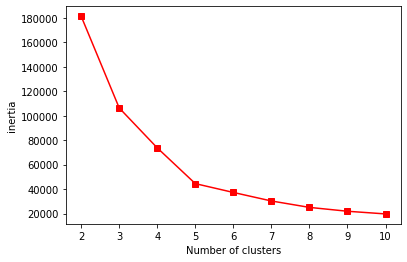

In [187]:
plt.plot(range(2, limit+1), inertiaList, 'rs-')
plt.xlabel('Number of clusters')
plt.ylabel('inertia') 
plt.show()

##### The point where the elbow shape is created is 5, which means our K value or optimal number of clusters is 5.

In [188]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)


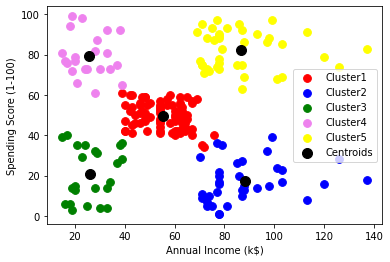

In [189]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()

In [190]:

# determining number of clusters
for k in range(2, limit+1):
	model = KMeans(n_clusters=k)
	model.fit(X)
	pred = model.predict(X)
	score = silhouette_score(X, pred)
	print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))


Silhouette Score for k = 2: 0.297
Silhouette Score for k = 3: 0.468
Silhouette Score for k = 4: 0.493
Silhouette Score for k = 5: 0.554
Silhouette Score for k = 6: 0.540
Silhouette Score for k = 7: 0.529
Silhouette Score for k = 8: 0.458
Silhouette Score for k = 9: 0.457
Silhouette Score for k = 10: 0.440
